### Data Preprocessing

Importing Marketing File and Showing the header and first few rows

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path_url = "D:\Leuphana_cousres\MScManagementDataScience\Applied_Statistical_Data_Analysis\Marketing_Campain_Analysis\marketing campaign.xlsx"
df = pd.read_excel(file_path_url, engine='openpyxl')
print(df.head())

   MarketID MarketSize LocationID  AgeOfStore  Promotion week SalesInThousands
0         1     Medium          1           4          3    1            33.73
1         1     Medium          1           4          3    2            35.67
2         1     Medium          1           4          3    3            29.03
3         1     Medium          1           4          3    4            39.25
4         1     Medium          2           5          2    1            27.81


<>:4: SyntaxWarning: invalid escape sequence '\L'
<>:4: SyntaxWarning: invalid escape sequence '\L'
C:\Users\Mohamed Elsafty\AppData\Local\Temp\ipykernel_24736\2422137706.py:4: SyntaxWarning: invalid escape sequence '\L'
  file_path_url = "D:\Leuphana_cousres\MScManagementDataScience\Applied_Statistical_Data_Analysis\Marketing_Campain_Analysis\marketing campaign.xlsx"


Check for the duplicate rows

In [98]:
duplicates = df[df.duplicated()]
print("Duplicate rows:\n", duplicates)

Duplicate rows:
 Empty DataFrame
Columns: [MarketID, MarketSize, LocationID, AgeOfStore, Promotion, week, SalesInThousands]
Index: []


Checking for the odds values by group the values of each column
Starting with MarketSize

In [99]:
###for col in df.columns:
print(f"Grouping by {df.columns[1]}:")
grouped = df.groupby(df.columns[1]).size()
print(grouped)
##print(df.columns[1])

Grouping by MarketSize:
MarketSize
  Large      1
 Medium      2
 small       1
Large      167
MEDIUM       1
Medium     317
SMALL        1
Small       56
Small_       1
Smalll       1
dtype: int64


From the above result we can see that only three Market Size are there but in different case and with some spelling mistake.
So to fine tune the market size, let replace it with the only Small, Medium and Large.

In [100]:
def modify_marketSize(x): 
    if "small".lower() in x.lower():
        return "Small"
    else:
        if "medium".lower() in x.lower():
            return "Medium"
        else:
            if "large".lower() in x.lower():
                return "Large"
    return " "

for i in range(len(df)):
    df.loc[i, 'MarketSize'] = modify_marketSize(df.loc[i, 'MarketSize'])

print(f"Grouping by {df.columns[1]}:")
grouped = df.groupby(df.columns[1]).size()
print(grouped)

Grouping by MarketSize:
MarketSize
Large     168
Medium    320
Small      60
dtype: int64


Doing same with the third Column to find outlier

In [101]:
print(f"Grouping by {df.columns[2]}:")
grouped = df.groupby(df.columns[2]).size()
print(grouped)

Grouping by LocationID:
LocationID
1      4
2      4
3      4
4      4
5      4
      ..
919    4
920    4
2O4    1
3O7    1
51l    1
Length: 140, dtype: int64


Remove the outlier which have only one values, like 3O7, 2O4 and 51l


In [102]:
df.loc[df['LocationID'] == '3O7', 'LocationID'] = 307
df.loc[df['LocationID'] == '2O4', 'LocationID'] = 204
df.loc[df['LocationID'] == '51l', 'LocationID'] = 511

Doing same with the Fourth Column to find outlier

In [103]:
print(f"Grouping by {df.columns[3]}:")
grouped = df.groupby(df.columns[3]).size()
print(grouped)

Grouping by AgeOfStore:
AgeOfStore
1     80
2     20
3     32
4     44
5     44
6     36
7     40
8     40
9     28
10    24
11    16
12    24
13    20
14    12
15     8
17     4
18     8
19    20
20     4
22    12
23     8
24    12
25     4
27     4
28     4
dtype: int64


In [104]:
print(f"Grouping by {df.columns[4]}:")
grouped = df.groupby(df.columns[4]).size()
print(grouped)

Grouping by Promotion:
Promotion
1    172
2    188
3    188
dtype: int64


In [105]:
print(f"Grouping by {df.columns[5]}:")
grouped = df.groupby(df.columns[5]).size()
print(grouped)

Grouping by week:
week
1          136
2          136
3          136
4          136
2000         1
4000000      1
one          1
three        1
dtype: int64


Removing outlier based on the initution and common sense

In [106]:
df.loc[df['week'] == 'one', 'week'] = 1
df.loc[df['week'] == 'three', 'week'] = 3
df.loc[df['week'] == 2000, 'week'] = 2
df.loc[df['week'] == 4000000, 'week'] = 4

In [107]:
print(f"Grouping by {df.columns[6]}:")
grouped = df.groupby(df.columns[6]).size()
print(grouped)

Grouping by SalesInThousands:
SalesInThousands
17.34    1
19.26    1
22.18    1
23.35    1
23.44    1
        ..
99.65    1
404      1
6263     1
68,42    1
77,17    1
Length: 517, dtype: int64


In [108]:
df['SalesInThousands'] = pd.to_numeric(df['SalesInThousands'], errors='coerce')

In [109]:
# Calculate Q1, Q3, and IQR
Q1 = df['SalesInThousands'].quantile(0.25)
Q3 = df['SalesInThousands'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lower_bound:\n", lower_bound)
print("upper_bound:\n", upper_bound)

# Identify outliers
outliers = df[(df['SalesInThousands'] < lower_bound) | (df['SalesInThousands'] > upper_bound)]
print("Outliers:\n", outliers)

lower_bound:
 15.833750000000006
upper_bound:
 87.12375
Outliers:
      MarketID MarketSize LocationID  AgeOfStore  Promotion week  \
80          3      Large        202           8          1    1   
83          3      Large        202           8          1    4   
84          3      Large        203          12          3    1   
88          3      Large        204           1          2    1   
90          3      Large        204           1          2    3   
93          3      Large        205          19          3    2   
95          3      Large        205          19          3    4   
99          3      Large        206          11          3    4   
100         3      Large        207           1          3    1   
103         3      Large        207           1          3    4   
104         3      Large        208           1          3    1   
106         3      Large        208           1          3    3   
108         3      Large        209           1          1    

In [110]:
df['SalesInThousands'] = df['SalesInThousands'].astype(str)
df['SalesInThousands'] = df['SalesInThousands'].str.replace(',', '.')
df['SalesInThousands'] = pd.to_numeric(df['SalesInThousands'], errors='coerce')
df['SalesInThousands'].head()

0    33.73
1    35.67
2    29.03
3    39.25
4    27.81
Name: SalesInThousands, dtype: float64

In [111]:
## df.to_csv("D:\Leuphana_cousres\MScManagementDataScience\Applied_Statistical_Data_Analysis\Marketing_Campain_Analysis\marketing_campaign_cleaned.csv", index=False)

### EDA


1. What are the total sales by each promotion?


Promotion
1    16124.98
2     9261.53
3    10331.35
Name: SalesInThousands, dtype: float64


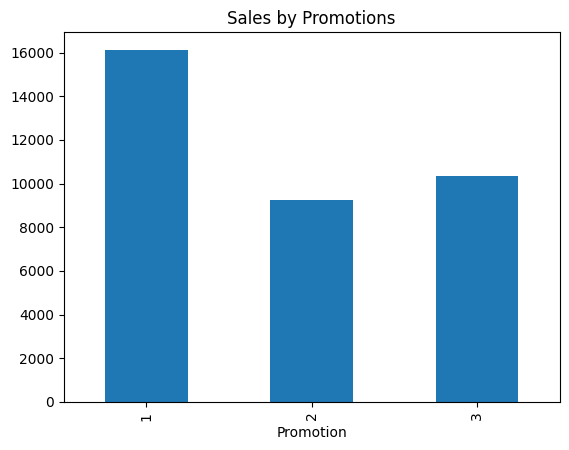

In [112]:
sales_by_promotion = df.groupby('Promotion')['SalesInThousands'].sum()
print(sales_by_promotion)
sales_by_promotion.plot(kind='bar', title='Sales by Promotions')
plt.show()

Promotion 1 has the highest total sales


2. What are the sales trends over time (weekly analysis)?

week
1     7732.91
2    13514.33
3     7257.60
4     7213.02
Name: SalesInThousands, dtype: float64


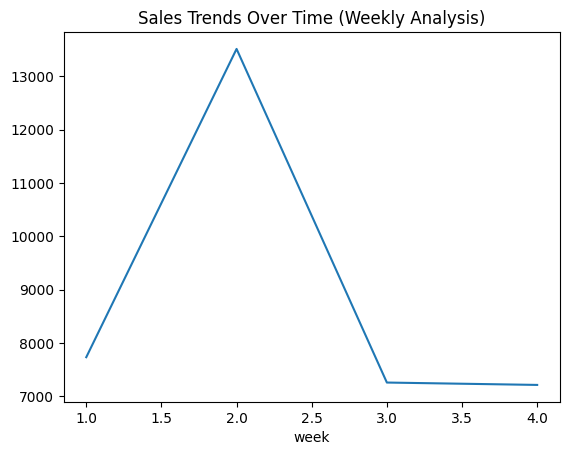

In [113]:
weekly_sales = df.groupby('week')['SalesInThousands'].sum()
print(weekly_sales)
weekly_sales.plot(kind='line', title='Sales Trends Over Time (Weekly Analysis)')
plt.show()

Sales peaked in week 2, then dropped significantly in week 3 and remained stable in week 4.

3. How does market size influence sales across different promotions?


Promotion            1          2          3
MarketSize                                  
Large        75.235893  60.322031  77.204681
Medium      112.259792  42.481019  45.468879
Small        59.727895  50.810625  59.514167


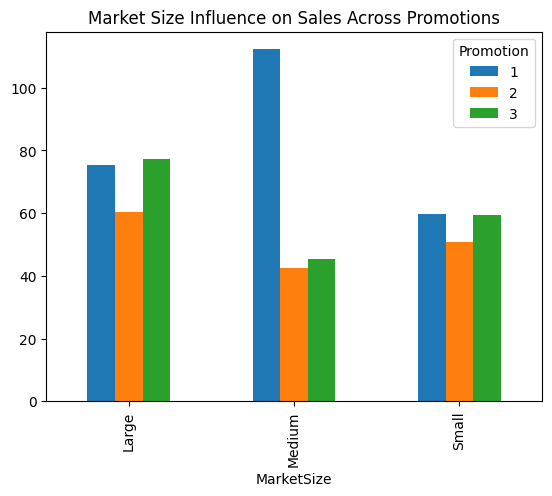

In [114]:
market_promotion_sales = df.groupby(['MarketSize', 'Promotion'])['SalesInThousands'].mean().unstack()
print(market_promotion_sales)
market_promotion_sales.plot(kind='bar', title='Market Size Influence on Sales Across Promotions')
plt.show()

Medium-sized markets have the highest average sales across all promotions, while small markets have the lowest average sales.

4. Did any promotion perform consistently better across all markets or only in specific market sizes?

MarketSize      Large      Medium      Small
Promotion                                   
1           75.235893  112.259792  59.727895
2           60.322031   42.481019  50.810625
3           77.204681   45.468879  59.514167


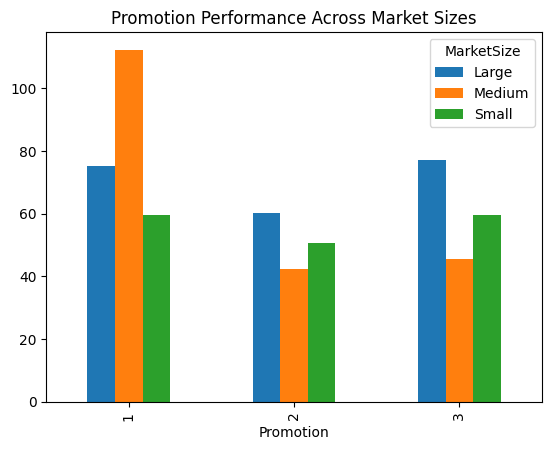

In [115]:
promotion_market_performance = df.groupby(['Promotion', 'MarketSize'])['SalesInThousands'].mean().unstack()
print(promotion_market_performance)
promotion_market_performance.plot(kind='bar', title='Promotion Performance Across Market Sizes')
plt.show()

Promotion 1 performs consistently well across all market sizes, while Promotion 2 performs better in medium and large markets.

5. Do older stores (high AgeOfStore) perform better or worse compared to newer stores?

AgeOfStore
1      58.415625
2      59.179500
3      60.227500
4      52.885814
5      48.818636
6     223.599167
7      52.128750
8      50.475750
9      48.996071
10     39.313750
11     57.159375
12     47.482917
13     59.642500
14     49.063333
15     42.673750
17     49.937500
18     50.710000
19     63.638000
20     60.202500
22     58.894545
23     65.097500
24     51.140833
25    136.325000
27     52.392500
28     52.285000
Name: SalesInThousands, dtype: float64


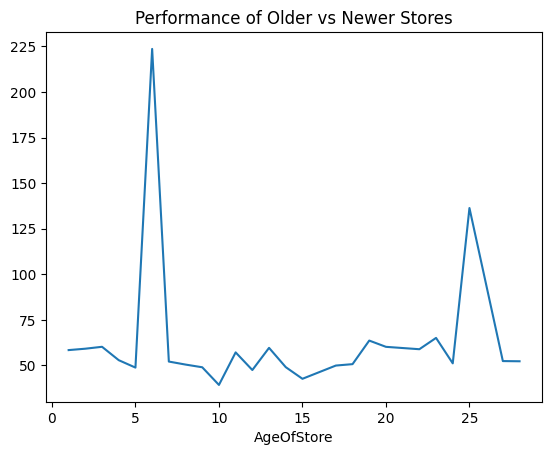

In [116]:
store_age_performance = df.groupby('AgeOfStore')['SalesInThousands'].mean()
print(store_age_performance)
store_age_performance.plot(kind='line', title='Performance of Older vs Newer Stores')
plt.show()

Older stores (with higher AgeOfStore) tend to have higher average sales compared to newer stores except the 5-7 ages.

6. Are there interactions between market size, store age, and promotions that significantly affect sales?

Promotion                       1           2          3
MarketSize AgeOfStore                                   
Large      1            70.969375   67.945000  87.370000
           2            76.112500         NaN  57.325000
           3            74.881250   47.062500  82.770000
           4                  NaN   76.820000  84.592857
           5            87.375000         NaN  84.905000
           6            71.447500   49.325000        NaN
           7                  NaN   63.420625  51.860000
           8            87.415000         NaN        NaN
           9                  NaN   46.600000        NaN
           10                 NaN   49.582500        NaN
           11                 NaN         NaN  84.142500
           12                 NaN         NaN  83.340000
           13                 NaN   65.997500        NaN
           14                 NaN   47.412500  52.967500
           19           89.262500         NaN  87.067500
           23                 N

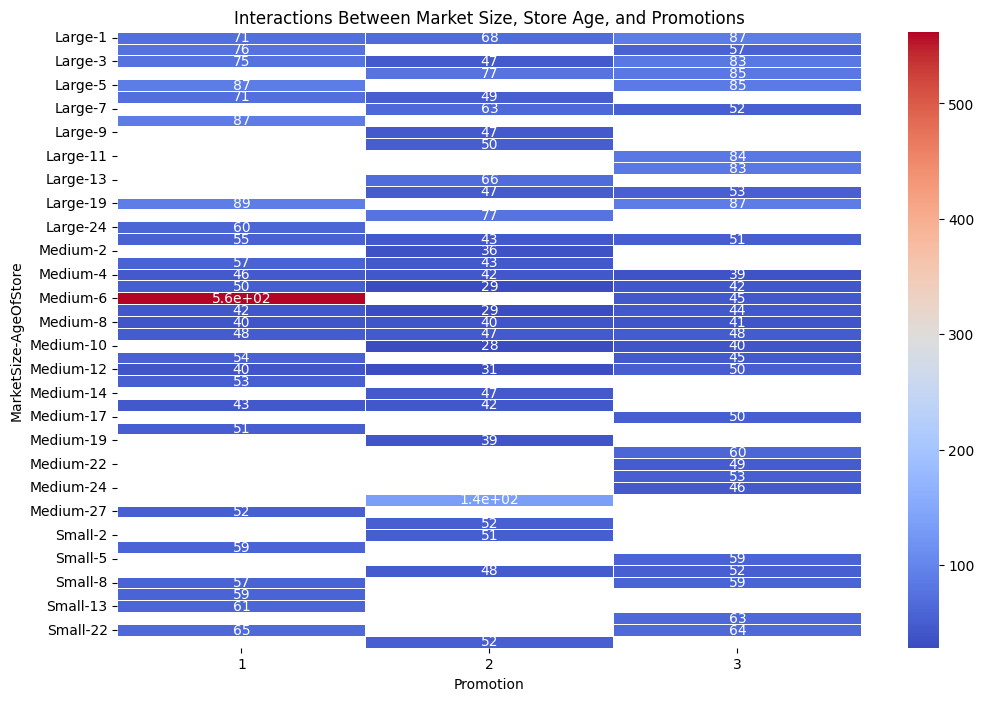

In [117]:
interaction_pivot = df.pivot_table(values='SalesInThousands', index=['MarketSize', 'AgeOfStore'], columns='Promotion', aggfunc='mean')
print(interaction_pivot)
plt.figure(figsize=(12, 8))
sns.heatmap(interaction_pivot, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Interactions Between Market Size, Store Age, and Promotions')
plt.show()

It seems that Promotion 1 performs exceptionally well in medium-sized markets with older stores.

7. Do sales from a particular promotion show any signs of diminishing returns over time?

week               1           2          3          4
Promotion                                             
1          58.244419  201.124186  58.545238  58.447209
2          55.466383   47.582553  47.722128  46.282766
3          55.776170   55.949149  54.377872  54.880435


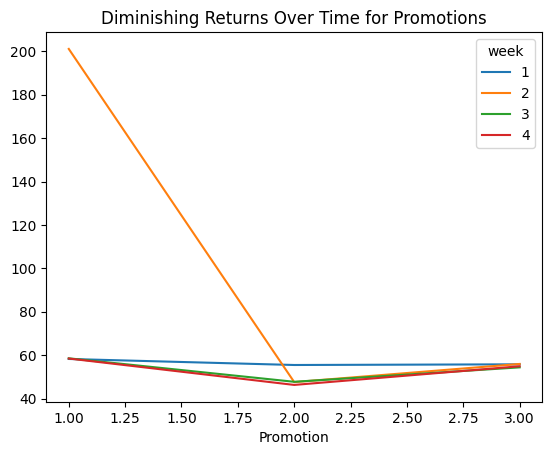

In [118]:
promotion_weekly_sales = df.groupby(['Promotion', 'week'])['SalesInThousands'].mean().unstack()
print(promotion_weekly_sales)
promotion_weekly_sales.plot(kind='line', title='Diminishing Returns Over Time for Promotions')
plt.show()

Promotion 1 shows signs of diminishing returns over time, with sales peaking in week 2 and then declining.

8. How do sales distributions (e.g., median, quartiles) differ among promotions, and what does this imply?

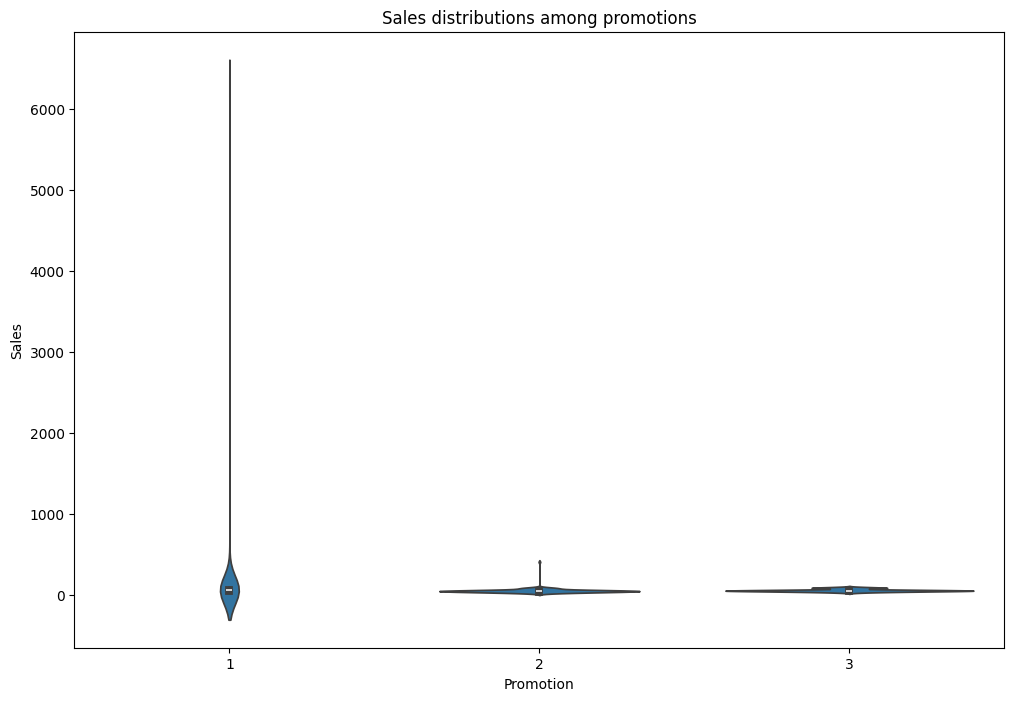

In [119]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Promotion', y='SalesInThousands', data=df)
plt.title('Sales distributions among promotions')
plt.xlabel('Promotion')
plt.ylabel('Sales')
plt.show()

Promotion 1 has a wider distribution of sales, indicating variability in its effectiveness. Promotion 2 has a more consistent sales distribution.